Calculate the mean, median, and mode of the sepal lengths in the Iris dataset.

In [15]:
from sklearn.datasets import load_iris
import pandas as pd
import statistics

dataset = load_iris()
dataframe = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)

sepal_lengths = dataframe['sepal length (cm)']

mean = sepal_lengths.mean()
median = sepal_lengths.median()
mode = statistics.mode(sepal_lengths)

print('Mean =',mean)
print('Mode =',mode)
print('Median =',median)

Mean = 5.843333333333334
Mode = 5.0
Median = 5.8


Calculate the variance and standard deviation of the petal widths in the Iris dataset.

In [18]:
import numpy as np
petal_widths = dataframe['petal width (cm)']

var = np.var(petal_widths, ddof=1)  
std = np.std(petal_widths, ddof=1)  

print('Variance =',var)
print('Standard Deviation =',std)

Variance = 0.5810062639821029
Standard Deviation = 0.7622376689603465


Create a summary table that includes the mean, median, variance, and standard deviation for all numerical features in the dataset.

In [19]:
summary = dataframe.agg(['mean', 'median', 'var', 'std']).T
summary.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation']

print(summary)

                       Mean  Median  Variance  Standard Deviation
sepal length (cm)  5.843333    5.80  0.685694            0.828066
sepal width (cm)   3.057333    3.00  0.189979            0.435866
petal length (cm)  3.758000    4.35  3.116278            1.765298
petal width (cm)   1.199333    1.30  0.581006            0.762238


Define a random variable for the sepal length and calculate the probability distribution of sepal lengths.

In [20]:
frequency = sepal_lengths.value_counts().sort_index()

probability_distribution = frequency / len(sepal_lengths)

probability_distribution = probability_distribution.reset_index()
probability_distribution.columns = ['Sepal Length (cm)', 'Probability']
print(probability_distribution)

    Sepal Length (cm)  Probability
0                 4.3     0.006667
1                 4.4     0.020000
2                 4.5     0.006667
3                 4.6     0.026667
4                 4.7     0.013333
5                 4.8     0.033333
6                 4.9     0.040000
7                 5.0     0.066667
8                 5.1     0.060000
9                 5.2     0.026667
10                5.3     0.006667
11                5.4     0.040000
12                5.5     0.046667
13                5.6     0.040000
14                5.7     0.053333
15                5.8     0.046667
16                5.9     0.020000
17                6.0     0.040000
18                6.1     0.040000
19                6.2     0.026667
20                6.3     0.060000
21                6.4     0.046667
22                6.5     0.033333
23                6.6     0.013333
24                6.7     0.053333
25                6.8     0.020000
26                6.9     0.026667
27                7.

Plot the probability distribution of sepal lengths using a histogram.

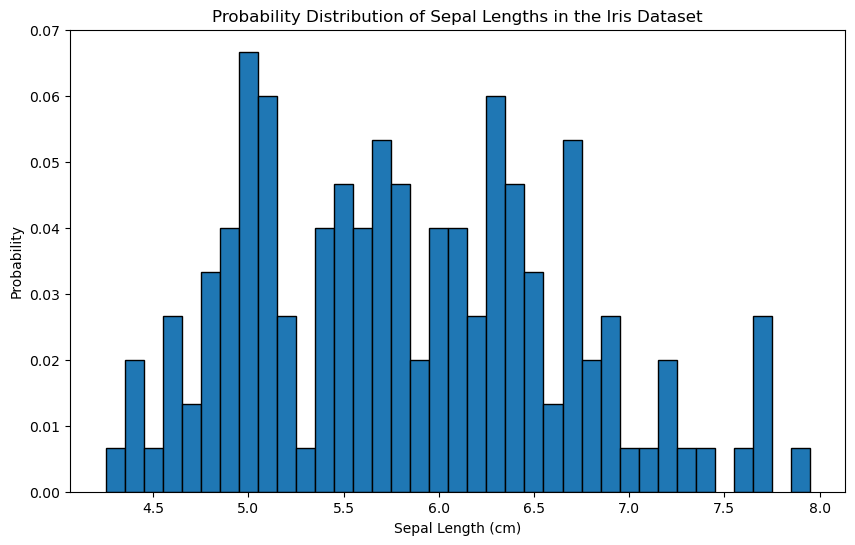

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(probability_distribution.index, probability_distribution, width=0.1, edgecolor='k')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Probability')
plt.title('Probability Distribution of Sepal Lengths in the Iris Dataset')
plt.show()

Calculate the cumulative distribution function (CDF) for the petal lengths and plot it.

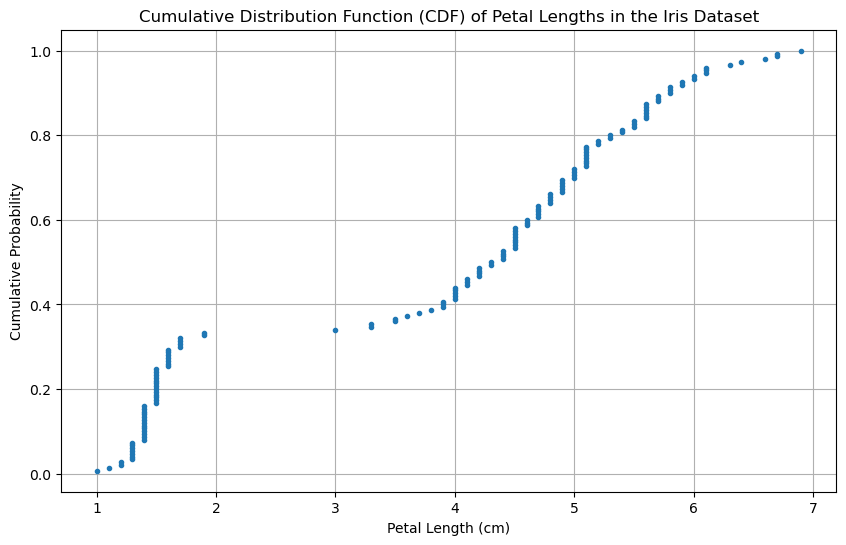

In [22]:
petal_lengths = dataframe['petal length (cm)']

sorted_petal_lengths = np.sort(petal_lengths)

# Calculate the cumulative probabilities
cumulative_probabilities = np.arange(1, len(sorted_petal_lengths) + 1) / len(sorted_petal_lengths)

# Plot the CDF
plt.figure(figsize=(10, 6))
plt.plot(sorted_petal_lengths, cumulative_probabilities, marker='.', linestyle='none')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF) of Petal Lengths in the Iris Dataset')
plt.grid(True)
plt.show()

Calculate and plot the probability density function (PDF) for sepal width.

E:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


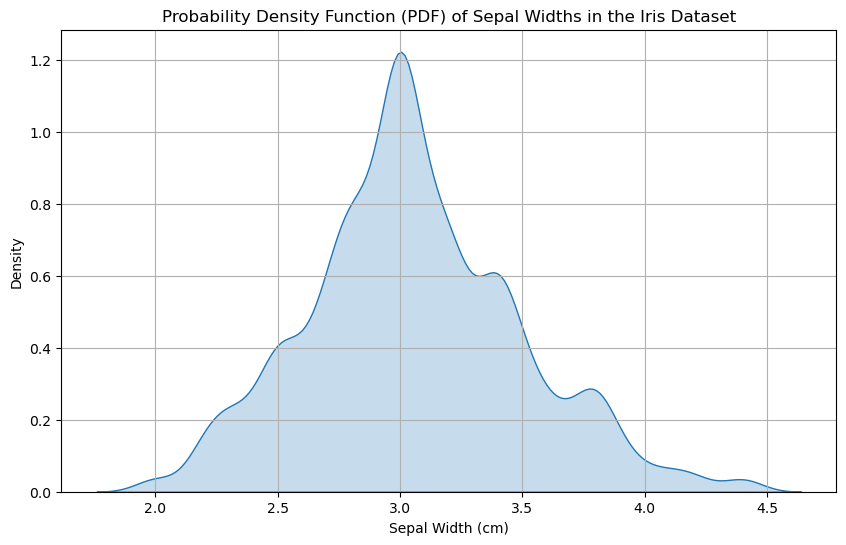

In [22]:
import seaborn as sns

sepal_widths = dataframe['sepal width (cm)']

# Plot the PDF using seaborn's KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(sepal_widths, bw_adjust=0.5, fill=True)
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Density')
plt.title('Probability Density Function (PDF) of Sepal Widths in the Iris Dataset')
plt.grid(True)
plt.show()

Determine the probability of a randomly selected iris flower having a petal length greater than a given value.

In [24]:
def probability_greater_than(value):
    cumulative_prob = np.searchsorted(sorted_petal_lengths, value, side='right') / len(sorted_petal_lengths)
    probability = 1 - cumulative_prob
    return probability

given_value = 4
prob = probability_greater_than(given_value)
print(f"The probability of a randomly selected iris flower having a petal length greater than {given_value} cm is {prob:.4f}")

The probability of a randomly selected iris flower having a petal length greater than 4 cm is 0.5600


Perform a hypothesis test to determine if there is a significant difference in the mean petal length between two species of iris flowers.

In [6]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

iris = sns.load_dataset('iris')

species1 = 'setosa'
species2 = 'versicolor'

petal_length_species1 = iris[iris['species'] == species1]['petal_length']
petal_length_species2 = iris[iris['species'] == species2]['petal_length']

t_statistic, p_value = stats.ttest_ind(petal_length_species1, petal_length_species2)

print("T-statistic",t_statistic)
print("P-value:", p_value)

alpha = 0.03
if p_value < alpha:
    print('Since the p-value', p_value, 'is less than the significance level ', alpha , 'we reject the null hypothesis.')
    print("There is a significant difference in the mean petal lengths between the two species.")
else:
    print('Since the p-value ', p_value, 'is less than the significance level ', alpha , 'we fail to reject the null hypothesis.')
    print("There is no significant difference in the mean petal lengths between the two species.")


T-statistic -39.492719391538095
P-value: 5.404910513441677e-62
Since the p-value 5.404910513441677e-62 is less than the significance level  0.03 we reject the null hypothesis.
There is a significant difference in the mean petal lengths between the two species.


Calculate and interpret the covariance and correlation between sepal length and sepal width.

In [8]:
covariance_matrix = np.cov(sepal_length, sepal_width)
covariance = covariance_matrix[0, 1]

correlation_matrix = np.corrcoef(sepal_length, sepal_width)
correlation = correlation_matrix[0, 1]

print("Covariance between sepal length and sepal width:",covariance)
print("Correlation between sepal length and sepal width:", correlation)

if covariance > 0:
    print("The covariance is positive, indicating that as sepal length increases, sepal width tends to increase as well.")
elif covariance < 0:
    print("The covariance is negative, indicating that as sepal length increases, sepal width tends to decrease.")
else:
    print("The covariance is zero, indicating no linear relationship between sepal length and sepal width.")

if correlation > 0:
    print("The correlation is positive, indicating a positive linear relationship between sepal length and sepal width.")
elif correlation < 0:
    print("The correlation is negative, indicating a negative linear relationship between sepal length and sepal width.")
else:
    print("The correlation is zero, indicating no linear relationship between sepal length and sepal width.")


Covariance between sepal length and sepal width: -0.042434004474272924
Correlation between sepal length and sepal width: -0.11756978413300208
The covariance is negative, indicating that as sepal length increases, sepal width tends to decrease.
The correlation is negative, indicating a negative linear relationship between sepal length and sepal width.
